In [1]:
# GHOST - Mesh Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from scipy import special
from math import floor, ceil
from Mesh import Mesh2D
from Discretization import SpatialDiscretization


# degree of discretization
p = [3]

# degree of geometry
p_geo = p[0]

Nd = len(p)

# 8 by 8 two-dimensional mesh
mesh = Mesh2D("quad_p3", "../mesh/square_mesh_x_5y_5.msh")
mesh.map_mesh(f_map=Mesh2D.grid_transformation(), p_geo=p_geo)

# map of element index to discretization
element_to_discretization = [k % Nd for k in range(0,mesh.K)]

tau = [2*p[i] + 1 for i in range(0, Nd)]
mu = [2*p[i] +1 for i in range(0,Nd)]

# volume nodes and quadrature
volume_quadrature = [mp.XiaoGimbutasSimplexQuadrature(tau[i],2) 
                     for i in range(0,Nd)]
volume_nodes = [volume_quadrature[i].nodes for i in range(0,Nd)]
W = [np.diag(volume_quadrature[i].weights) for i in range(0,Nd)]

# facet nodes and quadrature (assume same everywhere)
facet_quadrature = [mp.LegendreGaussQuadrature(floor((mu[i]-1)/2)) 
                    for i in range(0,Nd)]
facet_nodes = [SpatialDiscretization.map_unit_to_facets(
    facet_quadrature[i].nodes,
    element_type="triangle") for i in range(0,Nd)]
W_gamma = [[np.diag(facet_quadrature[i].weights) for gamma in range(0,3)]
           for i in range(0,Nd)]
n_hat = [[np.array([0.0,-1.0]), 
                     np.array([1.0/np.sqrt(2.0), 1.0/np.sqrt(2.0)]),
                     np.array([-1.0, 0.0])] for d in range(0,Nd)]


# build the discretization
discretization = SpatialDiscretization(mesh, element_to_discretization,
                                       p, volume_nodes, facet_nodes, 
                                       W, W_gamma, n_hat)

In [2]:
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

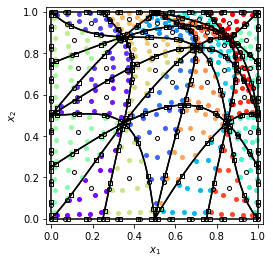

In [3]:
discretization.plot(plot_geometry_nodes=True)